# Openset analysis with baseline in multiclass setting

In [37]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from NegativeClassOptimization import config, datasets, ml, pipelines, preprocessing, utils, visualisations

In [31]:
api = utils.MlflowAPI()

api.mlflow_request("7", "dev-0.1.2-2")
df_mc = api.build_mlflow_results_df()

api.mlflow_request("9", "dev-0.1.2-1")
df_ml = api.build_mlflow_results_df()

In [32]:
print(df_mc.shape)
df_mc.head(2)

(435, 53)


,model,test,optimizer_type,sample_per_ag_train,sample_data_source,batch_size,epochs,N_open,N_closed,k,...,test_loss,precision_weighted_closed,precision_macro_closed,mlflow.source.git.commit,mlflow.note.content,mlflow.source.type,mlflow.runName,mlflow.source.name,mlflow.log-model.history,mlflow.user
0,SN10_MULTICLASS,False,Adam,1000,None,64,50,152408,7933,12,...,0.702957,0.822879,0.705299,425609bac5dac551019f486c385ccf00f759937d,1QFW_AB__2R56_A__2YPV_A__3HI6_A__3Q3G_E__4AEI_...,LOCAL,dev-0.1.2-2,scripts/script_08b_Multiclass_Absolut.py,"[{""run_id"": ""c280f43ba6ab42c7acb9698e48a85fd0""...",eugen
1,SN10_MULTICLASS,False,Adam,1000,None,64,50,152408,7883,12,...,0.635804,0.834425,0.707799,425609bac5dac551019f486c385ccf00f759937d,1NSN_S__1QFW_AB__2R29_A__2YPV_A__3CVH_ABC__3HI...,LOCAL,dev-0.1.2-2,scripts/script_08b_Multiclass_Absolut.py,"[{""run_id"": ""c559896718c54965b8d36f131619e512""...",eugen


In [33]:
print(df_ml.shape)
df_ml.head(2)

(366, 49)


,model,test,optimizer_type,sample_per_ag_train,sample_data_source,batch_size,epochs,N_open,N_closed,k,...,test_loss,precision_weighted_closed,precision_macro_closed,mlflow.source.git.commit,mlflow.note.content,mlflow.source.type,mlflow.runName,mlflow.source.name,mlflow.log-model.history,mlflow.user
0,SNN_MULTILABEL,False,Adam,1000,None,64,30,177407,11569,6,...,0.173522,0.887344,0.811413,47ce67212de2c1cdb8d45a3e643e114f8686c929,1H0D_C__2W9E_A__2YPV_A__3BGF_S__3L5X_A__3SKJ_E,LOCAL,dev-0.1.2-1,scripts/script_08b_Multiclass_Absolut.py,"[{""run_id"": ""3eed6b1e4afc4222934961e495d607fd""...",eugen
1,SNN_MULTILABEL,False,Adam,1000,None,64,30,177407,6093,3,...,0.199429,0.926582,0.916015,47ce67212de2c1cdb8d45a3e643e114f8686c929,1FSK_A__5CZV_A__5H35_C,LOCAL,dev-0.1.2-1,scripts/script_08b_Multiclass_Absolut.py,"[{""run_id"": ""3b56769e8ae84533bc34271f05120755""...",eugen


In [34]:
df = pd.concat([df_mc, df_ml], axis=0)

## Closed and open set performance with # classes

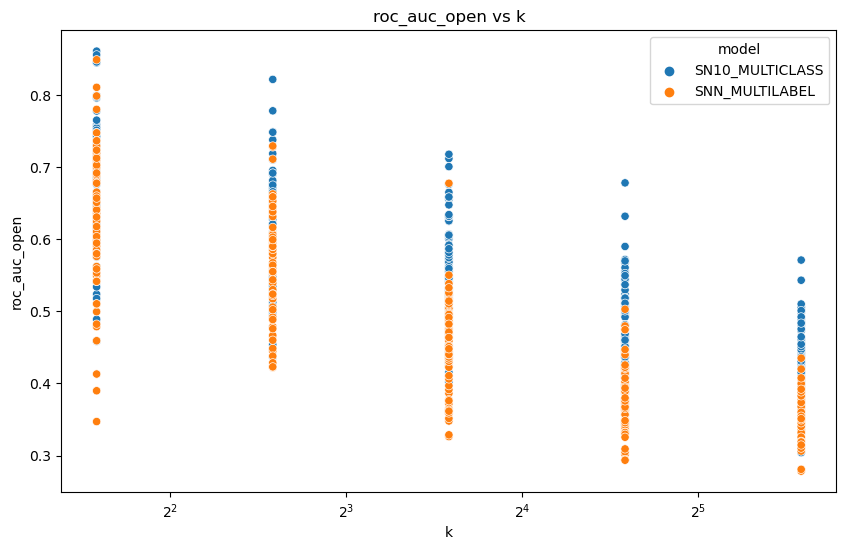

In [45]:
def plot_vs_k(df, y = "open_f1", x = "k"):
    df["k"] = df["k"].astype(int)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.scatterplot(data=df, x=x, y=y, hue="model", ax=ax)
    ax.set_title(f"{y} vs {x}")
    ax.set_xscale(matplotlib.scale.LogScale(ax, base=2))

# plot_vs_k(df, y="open_avg_precision")
# plot_vs_k(df, "open_precision")
# plot_vs_k(df, "open_recall")
plot_vs_k(df, "roc_auc_open")
# plot_vs_k(df, y="f1_macro_closed")
# plot_vs_k(df, y="f1_micro_closed")